In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
column_name= ['age','sex','cp','trestbps','chol','fbs',
              'restecg','thalach','exang','oldpeak','slope','ca','thal',
              'target']
df = pd.read_csv(r'/content/drive/MyDrive/Machine Learning/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
df['target'].unique()

array([1, 0])

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


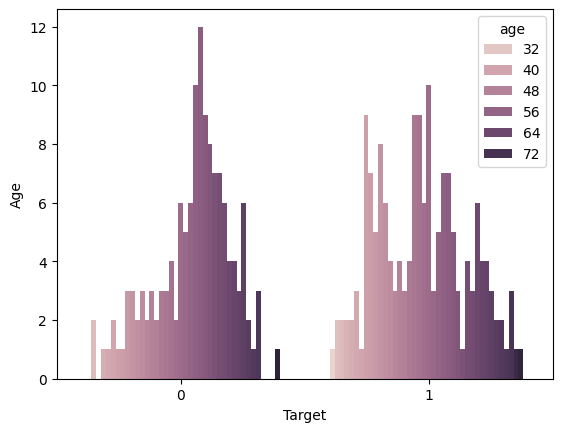

In [8]:
sns.countplot(data=df,x='target',hue='age');
plt.xlabel('Target')
plt.ylabel('Age')
plt.show()

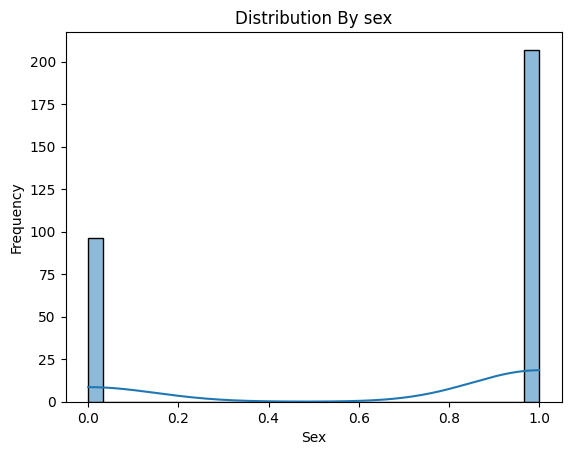

In [9]:
sns.histplot(df['sex'], bins=30, kde=True)
plt.title('Distribution By sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

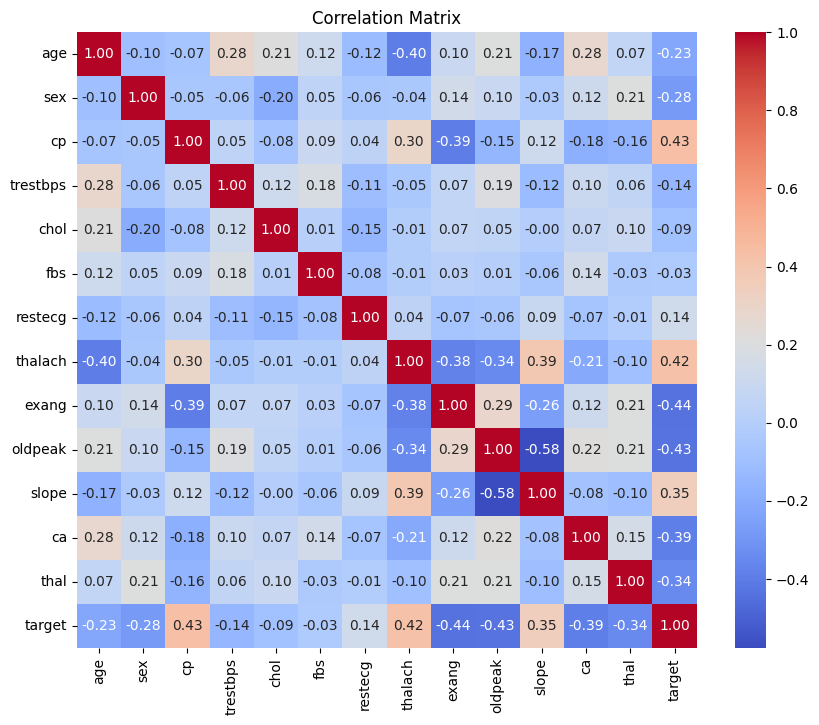

In [10]:
numeric = df.select_dtypes(include=[np.number])
corr_matrix = numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

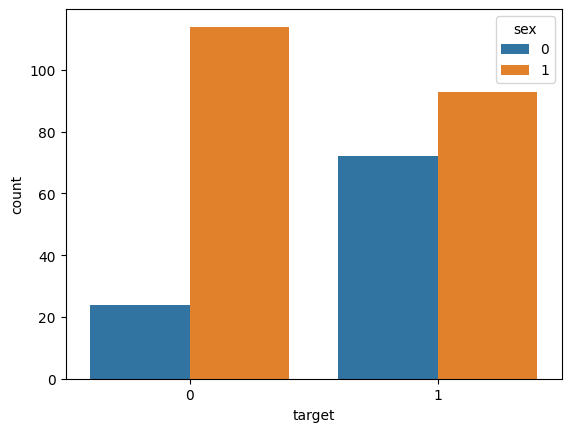

In [11]:
sns.countplot(data=df, x='target',hue='sex');

<ipython-input-12-7460211e0b73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='age', data=df, palette='muted')


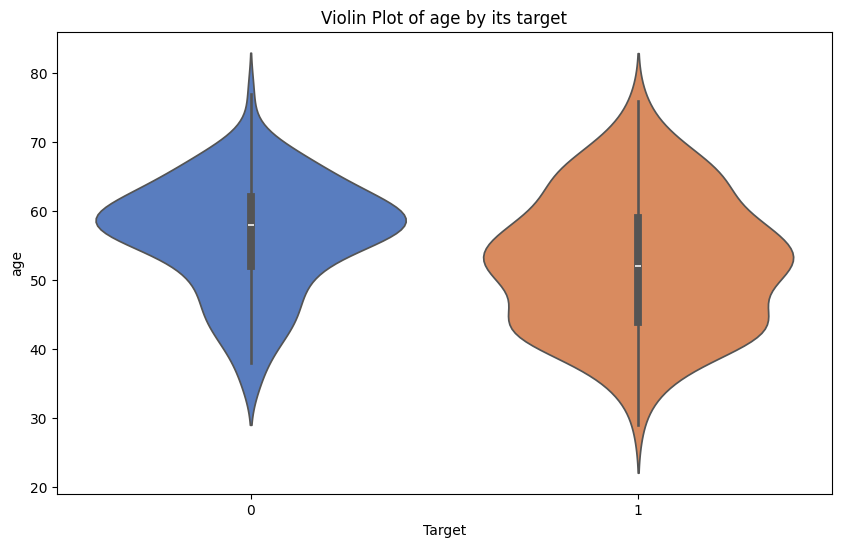

In [12]:
plt.figure(figsize=(10,6))
sns.violinplot(x='target', y='age', data=df, palette='muted')
plt.title('Violin Plot of age by its target')
plt.xlabel('Target')
plt.ylabel('age')
plt.show()

<ipython-input-13-22863fd09124>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='target', y='chol', data=df, palette='cool')


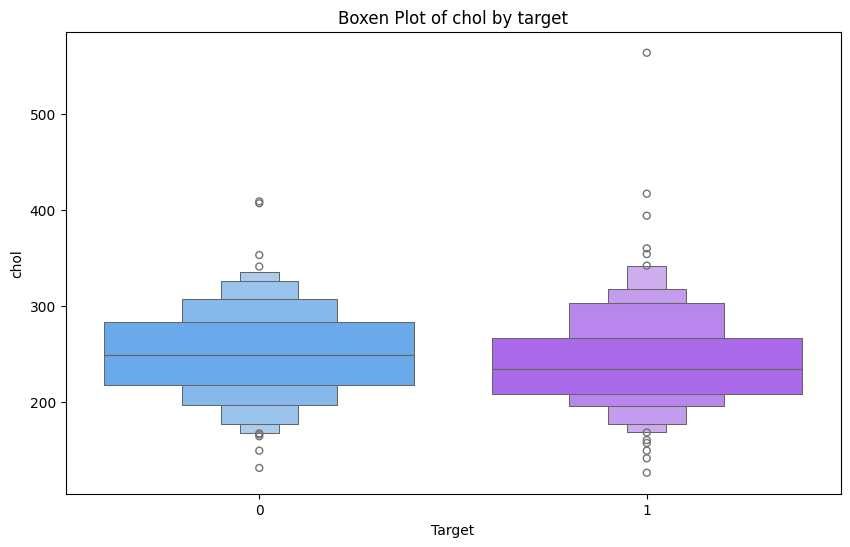

In [13]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='target', y='chol', data=df, palette='cool')
plt.title('Boxen Plot of chol by target')
plt.xlabel('Target')
plt.ylabel('chol')
plt.show()

In [14]:

df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df=df.astype(float)

X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [15]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_log_reg=log_reg.predict(X_test)
accuracy_log_reg=accuracy_score(y_test,y_pred_log_reg)
conf_matrix_log_reg=confusion_matrix(y_test,y_pred_log_reg)
class_report_log_reg=classification_report(y_test,y_pred_log_reg)
print(f"Logistic Regression Accuracy:{accuracy_log_reg:.2f}")
print('confusion_matrix:')
print(conf_matrix_log_reg)
print('classification_report:')
print(class_report_log_reg)

Logistic Regression Accuracy:0.85
confusion_matrix:
[[25  4]
 [ 5 27]]
classification_report:
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85        29
         1.0       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [16]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred_tree=tree_clf.predict(X_test)
accuracy_tree=accuracy_score(y_test,y_pred_tree)
conf_matrix_tree=confusion_matrix(y_test,y_pred_tree)
class_report_tree=classification_report(y_test,y_pred_tree)
print(f'Decision Tree Accuracy:{accuracy_tree:.2f}')
print('Confusion matrix:')
print(conf_matrix_tree)
print('classification_report')
print(class_report_tree)

Decision Tree Accuracy:0.79
Confusion matrix:
[[25  4]
 [ 9 23]]
classification_report
              precision    recall  f1-score   support

         0.0       0.74      0.86      0.79        29
         1.0       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [17]:
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
y_pred_knn=knn_clf.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_pred_log_reg)
conf_matrix_knn=confusion_matrix(y_test,y_pred_knn)
class_report_knn=classification_report(y_test,y_pred_knn)
print(f'k-NN Accuracy:{accuracy_knn:.2f}')
print('Confusion matrix:')
print(conf_matrix_knn)
print('classifiacation_report')
print(class_report_log_reg)

k-NN Accuracy:0.85
Confusion matrix:
[[27  2]
 [ 4 28]]
classifiacation_report
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85        29
         1.0       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [18]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_test,y_test)
y_pred_clf=clf.predict(X_test)
accuracy_clf=accuracy_score(y_test,y_pred_clf)
conf_matrix_clf=confusion_matrix(y_test,y_pred_clf)
class_report_clf=classification_report(y_test,y_pred_clf)
print(f'SVM:{accuracy_clf:.2f}')
print('Confusion matrix:')
print(conf_matrix_clf)
print('classification_report')
print(class_report_clf)

SVM:0.95
Confusion matrix:
[[27  2]
 [ 1 31]]
classification_report
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95        29
         1.0       0.94      0.97      0.95        32

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



In [19]:
from sklearn.linear_model import SGDClassifier

classify = SGDClassifier(loss='hinge', penalty='l2', max_iter=5) # Changed penalty to 'l2'
classify.fit(X_test, y_test)
y_pred_classify = classify.predict(X_test)
accuarcy_classify = accuracy_score(y_test, y_pred_classify)
conf_matrix_classify = confusion_matrix(y_test, y_pred_classify)
class_report_classify = classification_report(y_test, y_pred_classify)
print(f'SGD:{accuarcy_classify:.2f}')
print('Confusion matrix:')
print(conf_matrix_classify)
print('classification_report')
print(class_report_classify)


SGD:0.87
Confusion matrix:
[[25  4]
 [ 4 28]]
classification_report
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        29
         1.0       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Text(1180.4281045751634, 0.5, 'Actual')

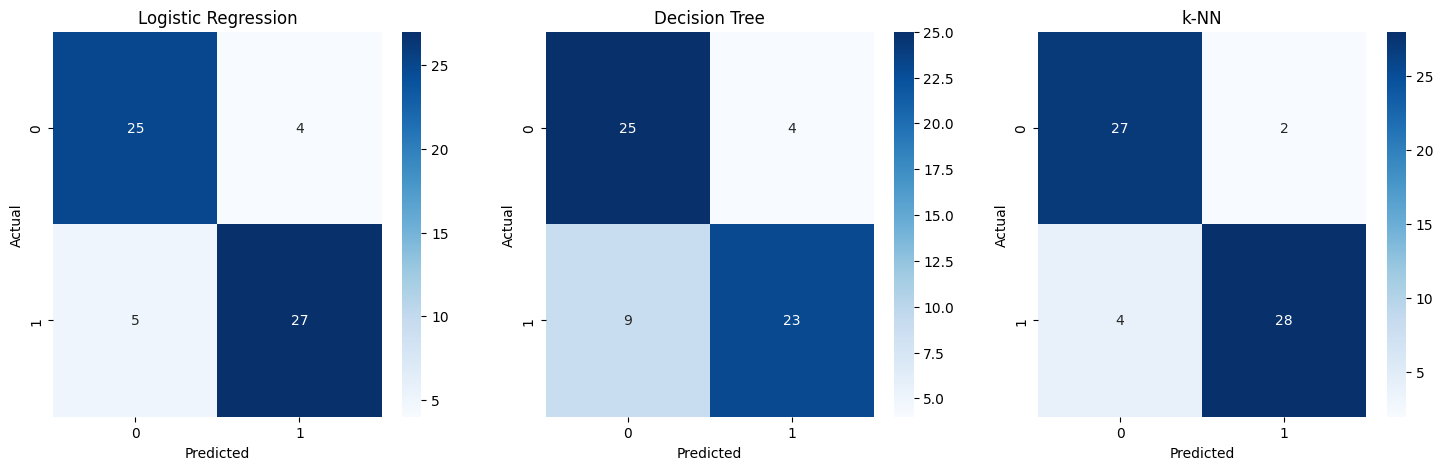

In [20]:
#visualizing
fig,axes=plt.subplots(1,3,figsize=(18,5))
#Logistic regression
sns.heatmap(conf_matrix_log_reg,annot=True,fmt='d',cmap='Blues',ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

#Decision Tree
sns.heatmap(conf_matrix_tree,annot=True,fmt='d',cmap='Blues',ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

#knn
sns.heatmap(conf_matrix_knn,annot=True,fmt='d',cmap='Blues',ax=axes[2])
axes[2].set_title('k-NN')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

In [22]:
from sklearn.ensemble import RandomForestClassifier
random_clf=RandomForestClassifier(n_estimators=100)
random_clf.fit(X_test,y_test)
y_pred_random=random_clf.predict(X_test)
accuracy_random=accuracy_score(y_test,y_pred_random)
conf_matrix_random=confusion_matrix(y_test,y_pred_random)
class_report_random=classification_report(y_test,y_pred_random)
print(f'Random Forest:{accuracy_random:.2f}')
print('Confusion matrix:')
print(conf_matrix_random)
print('classification_report')
print(class_report_random)

import pickle
# Save model and scaler as pickle files
with open("heart_disease_model.pkl", "wb") as model_file:
    pickle.dump(random_clf, model_file)

with open("heart_disease_scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler,scaler_file)



Random Forest:1.00
Confusion matrix:
[[29  0]
 [ 0 32]]
classification_report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        29
         1.0       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [28]:
import pickle
import numpy as np

def infer_heart_disease(model_path, scaler_path, input_features):
    """
    Perform inferencing on the heart disease dataset.

    Parameters:
    - model_path (str): Path to the saved model pickle file.
    - scaler_path (str): Path to the saved scaler pickle file.
    - input_features (list): List of input features in the order:
      [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]

    Returns:
    - str: "Disease Detected" if target is 1, otherwise "No Disease".
    """
    try:
        # Load the trained model and scaler
        with open(r'/content/heart_disease_model.pkl', 'rb') as model_file:
            model = pickle.load(model_file)

        with open(r'/content/heart_disease_scaler.pkl', 'rb') as scaler_file:
            scaler = pickle.load(scaler_file)

        # Ensure the input features are in the correct format
        input_array = np.array([input_features]).reshape(1, -1)

        # Scale the input features
        scaled_input = scaler.transform(input_array)

        # Predict outcome
        prediction = model.predict(scaled_input)

        # Return result
        return "Disease Detected" if prediction[0] == 1 else "No Disease"

    except Exception as e:
        return f"An error occurred: {e}"
# Example input: Replace with actual feature values
input_features = [45, 1, 3, 120, 233, 0, 1, 150, 0, 2.3, 0, 0, 1]

# Paths to your saved model and scaler
model_path = 'heart_disease_model.pkl'
scaler_path = 'heart_disease_scaler.pkl'

# Perform inference
result = infer_heart_disease(model_path, scaler_path, input_features)
print(result)

Disease Detected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
